# **Project Name**    -   Uber Demand–Supply Gap Analysis



##### **Project Type**    - Exploratory Data Analysis (EDA) & Business Intelligence Dashboard
##### **Contribution**    - Individual
##### **Author**          - Bhavesh Kumar

# **Project Summary -**

This project analyzes Uber cab request data to identify demand–supply gaps, trip fulfillment issues, and operational inefficiencies.

Python was used for data cleaning and preprocessing, SQL for extracting analytical insights, and Excel for building interactive dashboards.

The analysis focuses on understanding trip failures, peak demand hours, and performance differences between airport and city pickups. Insights from EDA were used to design dashboards that support operational decision-making.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Uber often faces situations where customer demand exceeds available supply, leading to cancellations and unfulfilled requests.

The objective of this project is to analyze Uber trip request data to identify when and where supply shortages occur, understand reasons for trip failures, and provide actionable insights through dashboards.

#### **Define Your Business Objective?**

- Identify demand and supply patterns across time

- Analyze trip failure reasons (Cancelled, No Cars Available)

- Compare performance between Airport and City pickups

- Identify peak hours with high failure rates

- Provide actionable insights for operational improvement using dashboards

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
import pandas as pd
import numpy as np

### Dataset Loading

In [3]:
df = pd.read_csv("Uber Request Data.csv")

### Dataset First View

In [9]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Dataset Rows & Columns count

In [10]:
df.shape

(6745, 6)

### Dataset Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


#### Duplicate Values

In [7]:
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [8]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

### What did you know about your dataset?

After the initial data inspection, it is clear that the dataset is structured and well-formed, with 6,745 records capturing Uber trip requests.
The data contains meaningful time, location, and status variables, and while a few fields (Driver ID and Drop Timestamp) have missing values, these are expected and valid for unfulfilled trips, indicating no major data quality issues at this stage.

## ***2. Understanding Your Variables***

In [9]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [11]:
df.describe

<bound method NDFrame.describe of       Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
...          ...          ...        ...                ...   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

        Request timestamp       Drop timestamp  
0         11/7/2016 11:51      11/7/2016 13:00  
1         11/7/2016 17:57      11/7/2016 18:47  
2          12/7/2016 9:17       12/7/2016 9:58  
3         12/

### Variables Description

| Variable Name	   |  Description                                                                                |
|------------------|---------------------------------------------------------------------------------------------|
| Request id	   |   Unique identifier for each Uber cab request                                               |
| Pickup point	   |  Location of pickup, either City or Airport                                                 |
| Driver id	       |  Unique identifier of the driver assigned to the trip (missing when no driver was available)|
| Status           |  Outcome of the request: Trip Completed, Cancelled, or No Cars Available                    |
| Request timestamp|  Date and time of request                                                                   |
| Drop timestamp   |  Date and time of drop                                                                      |

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Pickup point: ['Airport' 'City']
Status: ['Trip Completed' 'Cancelled' 'No Cars Available']
Request timestamp: ['11/7/2016 11:51' '11/7/2016 17:57' '12/7/2016 9:17' ...
 '15-07-2016 23:52:06' '15-07-2016 23:54:39' '15-07-2016 23:55:03']
Drop timestamp: ['11/7/2016 13:00' '11/7/2016 18:47' '12/7/2016 9:58' ...
 '13-07-2016 23:43:13' '15-07-2016 09:56:07' nan]


### **Dataset Description**
The dataset contains 6,745 records and 11 columns representing Uber cab requests.
Initial exploration was performed to understand the data structure, column types, missing values, and categorical distributions.
his step helped identify key variables such as trip status, pickup location, and time-based fields for further analysis. 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# Format timestamps columns to datetime
df['Request timestamp'] = pd.to_datetime(
    df['Request timestamp'],
    dayfirst=True,
    format='mixed'
)

df['Drop timestamp'] = pd.to_datetime(
    df['Drop timestamp'],
    dayfirst=True,
    format='mixed'
)

In [12]:
# Separate date and time from Request and Drop timestamps
df["Request Date"] = df["Request timestamp"].dt.date
df["Request Time"] = df["Request timestamp"].dt.time
df["Drop Date"] = df["Drop timestamp"].dt.date
df["Drop Time"] = df["Drop timestamp"].dt.time

In [13]:
# Extracting hour and day of Request 
df['Request hour'] = df['Request timestamp'].dt.hour
df['Request day'] = df['Request timestamp'].dt.day_name()

In [14]:
# Droping Request and Drop timestamps as they are separated
df.drop(columns=["Request timestamp","Drop timestamp"],inplace = True)

In [15]:
# Adding a column 'Trip Completed' which shows 1 if trip completed else 0 
df["Trip Completed"] = np.where(df["Status"] == "Trip Completed",1,0)

In [16]:
# Updated columns with proper formats
df.head()

,Request id,Pickup point,Driver id,Status,Request Date,Request Time,Drop Date,Drop Time,Request hour,Request day,Trip Completed
0,619,Airport,1.0,Trip Completed,2016-07-11,11:51:00,2016-07-11,13:00:00,11,Monday,1
1,867,Airport,1.0,Trip Completed,2016-07-11,17:57:00,2016-07-11,18:47:00,17,Monday,1
2,1807,City,1.0,Trip Completed,2016-07-12,09:17:00,2016-07-12,09:58:00,9,Tuesday,1
3,2532,Airport,1.0,Trip Completed,2016-07-12,21:08:00,2016-07-12,22:03:00,21,Tuesday,1
4,3112,City,1.0,Trip Completed,2016-07-13,08:33:16,2016-07-13,09:25:47,8,Wednesday,1


In [17]:
# Final cleaned dataset for analysis
df.shape

(6745, 11)

### What all manipulations have you done and insights you found?

- Data wrangling was performed to prepare the dataset for analysis.
- Date and time columns were converted into appropriate datetime formats, and new time-based features such as Request Hour and Day of Week were created to support temporal analysis.
- Categorical values were standardized, and missing values were checked to ensure data quality.
- These transformations made the dataset suitable for exploratory data analysis and dashboard creation.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

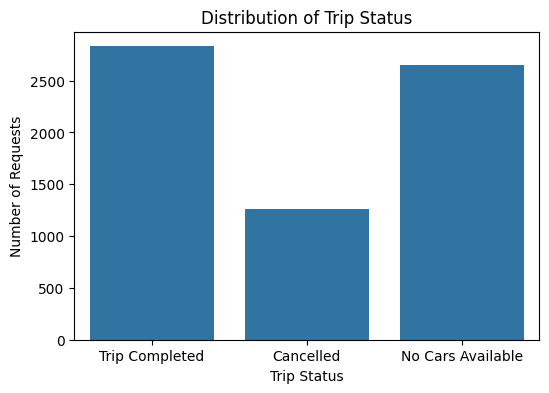

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Status')
plt.title('Distribution of Trip Status')
plt.xlabel('Trip Status')
plt.ylabel('Number of Requests')
plt.show()

##### 1. Why did you pick the specific chart?

To understand the overall outcome of Uber requests and quantify how many trips are successfully completed versus failed.

##### 2. What is/are the insight(s) found from the chart?

- A significant portion of requests are not completed.

- Trip failures form a noticeable share of total demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This insight highlights operational inefficiencies and helps Uber focus on improving fulfillment rates.

Negative growth insight:
High failure volume indicates lost revenue and poor customer experience if not addressed

#### Chart - 2

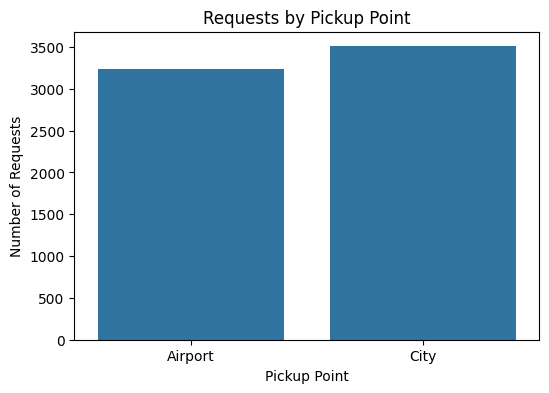

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Pickup point')
plt.title('Requests by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')
plt.show()

##### 1. Why did you pick the specific chart?

To compare demand distribution between City and Airport pickup locations.

##### 2. What is/are the insight(s) found from the chart?

- Airport contributes a substantial share of total requests.

- Demand is not evenly distributed across locations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Helps optimize driver deployment by location.

#### Chart - 3

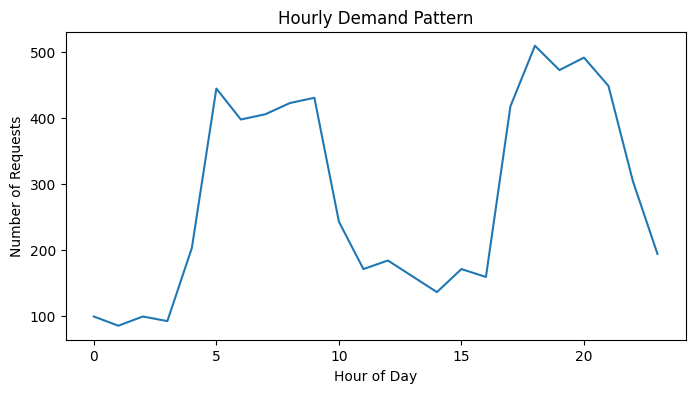

In [18]:
hourly_demand = df['Request hour'].value_counts().sort_index()

plt.figure(figsize=(8,4))
sns.lineplot(x=hourly_demand.index, y=hourly_demand.values)
plt.title('Hourly Demand Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.show()

##### 1. Why did you pick the specific chart?

To identify peak and off-peak demand hours throughout the day.

##### 2. What is/are the insight(s) found from the chart?

- Demand peaks during morning and evening hours.

- Demand drops significantly during late night and mid-day hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Enables better shift planning, surge pricing, and driver incentives.

Negative growth insight:
Failure to scale supply during peak hours results in missed revenue opportunities.

#### Chart - 4

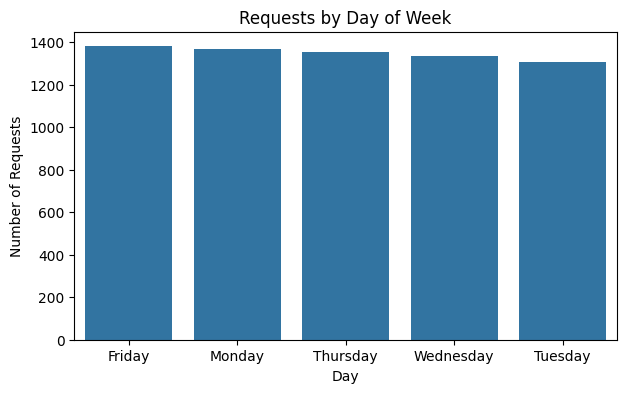

In [19]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Request day',
              order=df['Request day'].value_counts().index)
plt.title('Requests by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Requests')
plt.show()

##### 1. Why did you pick the specific chart?

- To analyze how demand varies across different days of the week.

##### 2. What is/are the insight(s) found from the chart?

- Certain weekdays experience higher request volumes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes. Supports weekly driver scheduling and demand forecasting.

#### Chart - 5

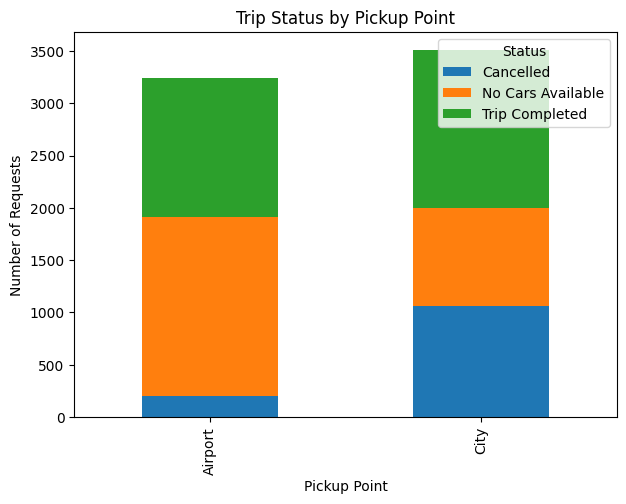

In [20]:
status_pickup = pd.crosstab(df['Pickup point'], df['Status'])

status_pickup.plot(kind='bar', stacked=True, figsize=(7,5))
plt.title('Trip Status by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')
plt.show()

##### 1. Why did you pick the specific chart?

- To compare trip outcomes across City and Airport locations.

##### 2. What is/are the insight(s) found from the chart?

- Airport pickups show a higher proportion of failed trips.

- City pickups have better completion performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes. Highlights location-specific operational issues requiring targeted action.

#### Chart - 6

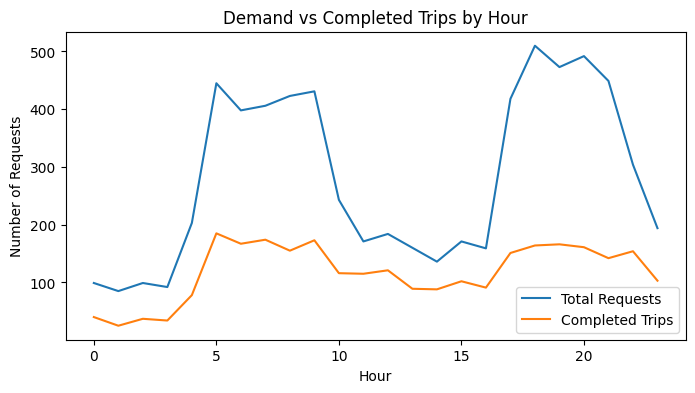

In [21]:
demand_supply = df.groupby('Request hour').agg(
    total_requests=('Request id', 'count'),
    completed_trips=('Status', lambda x: (x == 'Trip Completed').sum()))

plt.figure(figsize=(8,4))
plt.plot(demand_supply.index, demand_supply['total_requests'], label='Total Requests')
plt.plot(demand_supply.index, demand_supply['completed_trips'], label='Completed Trips')
plt.title('Demand vs Completed Trips by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Requests')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

- To directly compare customer demand with actual trip fulfillment over time.

##### 2. What is/are the insight(s) found from the chart?

- Completed trips do not scale proportionally with demand during peak hours.

- A visible demand–supply gap exists.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes. Helps identify hours requiring immediate operational intervention.

- Negative growth insight:  Persistent supply gaps during peak demand lead to revenue loss and customer churn.

#### Chart - 7

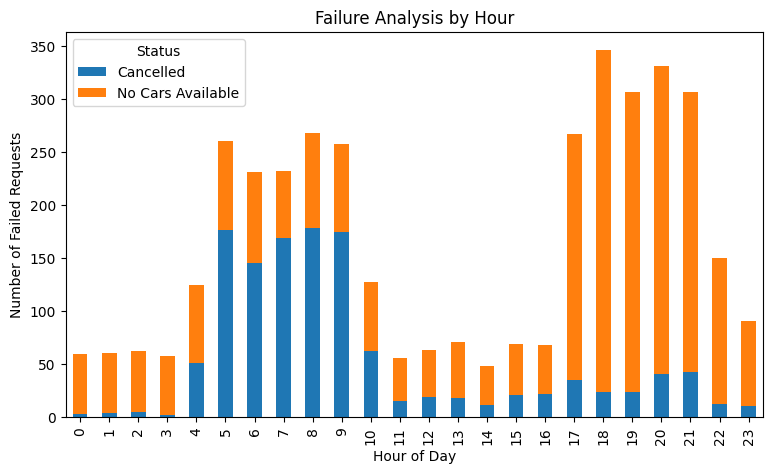

In [22]:
failure_hour = df[df['Status'] != 'Trip Completed'] \
    .groupby(['Request hour','Status']).size().unstack(fill_value=0)

failure_hour.plot(kind='bar', stacked=True, figsize=(9,5))
plt.title('Failure Analysis by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Failed Requests')
plt.show()

##### 1. Why did you pick the specific chart?

- To identify when trip failures occur and understand their timing.

##### 2. What is/are the insight(s) found from the chart?

- Failures peak during high-demand hours.

- No Cars Available is the dominant failure reason.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes. Helps Uber proactively manage risk hours.

- Negative growth insight:
High failure concentration during peak hours directly affects customer trust.

#### Chart - 8

C:\Users\Bhavesh Kumar\AppData\Local\Temp\ipykernel_18696\1118502984.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  failure_rate = df.groupby('Request hour').apply(


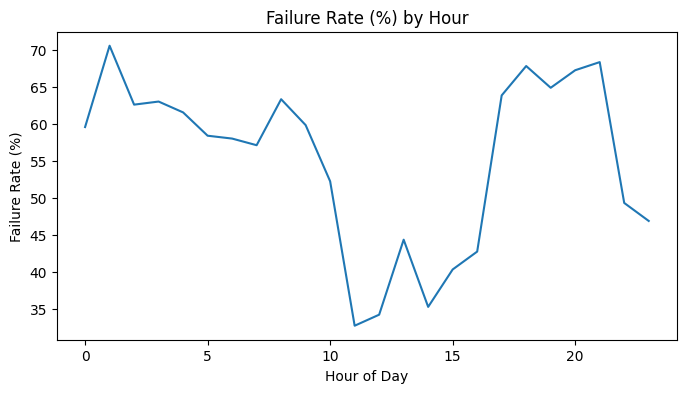

In [23]:
failure_rate = df.groupby('Request hour').apply(
    lambda x: (x['Status'] != 'Trip Completed').sum() / len(x) * 100)

plt.figure(figsize=(8,4))
sns.lineplot(x=failure_rate.index, y=failure_rate.values)
plt.title('Failure Rate (%) by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Failure Rate (%)')
plt.show()

##### 1. Why did you pick the specific chart?

- To normalize failures relative to demand and identify high-risk hours.

##### 2. What is/are the insight(s) found from the chart?**

- Some hours have disproportionately high failure rates.

- Failure probability varies significantly across the day.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes. Enables preventive actions such as targeted incentives.

#### Chart - 9

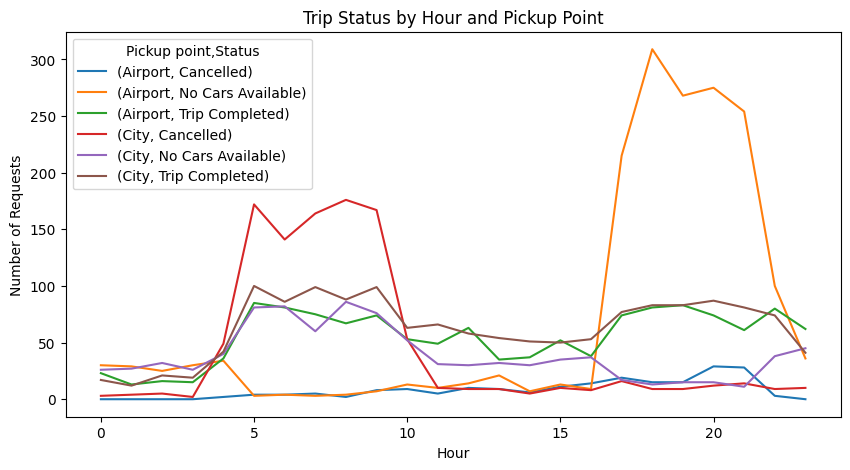

In [24]:
pivot_multi = pd.pivot_table(
    df,
    values='Request id',
    index='Request hour',
    columns=['Pickup point', 'Status'],
    aggfunc='count',
    fill_value=0
)

pivot_multi.plot(figsize=(10,5))
plt.title('Trip Status by Hour and Pickup Point')
plt.xlabel('Hour')
plt.ylabel('Number of Requests')
plt.show()

##### **1. Why did you pick the specific chart?**

- To analyze the combined impact of time and location on trip outcomes.

##### **2. What is/are the insight(s) found from the chart?**

- Airport failures intensify during peak hours.

- Time and location together significantly influence performance.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes. Supports location-specific planning during critical hours.

#### Chart - 10

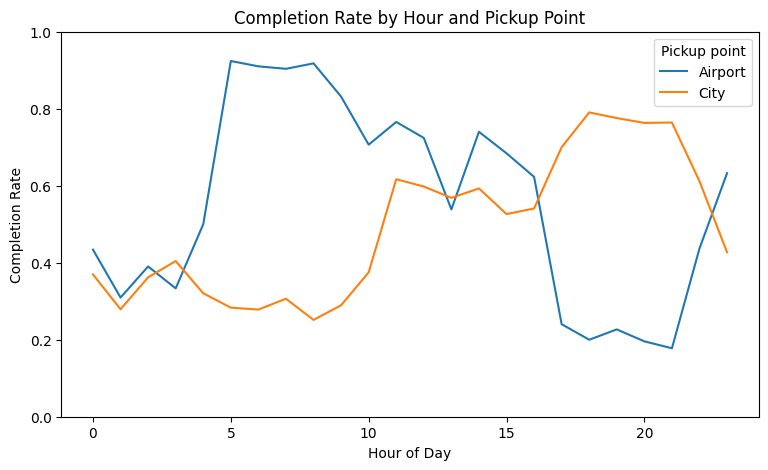

In [ ]:
# Calculate completion rate by hour and pickup point
completion_rate = (
    df.assign(completed = df['Status'] == 'Trip Completed')
      .groupby(['Request hour', 'Pickup point'])
      .agg(completion_rate_pct=('completed', 'mean'))
      .reset_index()
)

# Plot
plt.figure(figsize=(9,5))
sns.lineplot(
    data=completion_rate,
    x='Request hour',
    y='completion_rate_pct',
    hue='Pickup point'
)

plt.title('Completion Rate by Hour and Pickup Point')
plt.xlabel('Hour of Day')
plt.ylabel('Completion Rate')
plt.ylim(0, 1)
plt.show()

##### **1. Why did you pick the specific chart?**

- To evaluate service quality by comparing completion rates instead of raw counts.

##### **2. What is/are the insight(s) found from the chart?**

- Completion rates drop during peak hours.

- Airport underperforms in evening and late-night compared to City pickups.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

- Low completion rates during high-demand periods indicate poor service reliability and lost revenue.

Answer Here

## **5. Solution to Business Objective**

#### **What do you suggest the client to achieve Business Objective ?**

Based on the exploratory data analysis and visualizations, the primary business challenge identified is a demand–supply mismatch, particularly during peak hours and at airport pickup locations. Most trip failures are driven by vehicle unavailability rather than user cancellations.

To address this, Uber should:

- Increase driver availability during peak hours by introducing time-based incentives and surge pricing.

- Deploy location-specific strategies for airport pickups, such as dedicated airport driver pools or priority queuing.

- Use failure-rate metrics to proactively identify high-risk hours and adjust supply before service degradation occurs.

- Continuously monitor completion and failure rates through dashboards to enable real-time operational decisions.

Implementing these solutions can reduce trip failures, improve customer satisfaction, and increase completed trips, directly contributing to positive business growth and operational efficiency.

# **Conclusion**

This project successfully analyzed Uber’s cab request data to identify key demand–supply gaps and operational inefficiencies. Through exploratory data analysis, it was observed that trip failures are primarily driven by vehicle unavailability, especially during peak demand hours and at airport pickup locations.

The analysis highlighted clear temporal and location-based patterns affecting trip completion rates. By leveraging Python for data preparation, SQL for analytical insights, and Excel for interactive dashboarding, the project demonstrates how data-driven analysis can support better resource allocation, improved service reliability, and enhanced customer experience.

Overall, the insights derived from this analysis can help Uber optimize driver deployment, reduce cancellations, and improve fulfillment rates, contributing to sustainable operational and business growth.